## Hypothesis B: Impact of Consumer Type on Energy Demand

### Objective
To determine if there are statistically significant differences in mean energy demand across different consumer types (residential, commercial, industrial).

---

### Hypotheses

**Null Hypothesis (H₀):**  
The mean energy demand is equal across all consumer types.  
**H₀:** μ<sub>residential</sub> = μ<sub>commercial</sub> = μ<sub>industrial</sub>

**Alternative Hypothesis (Hₐ):**  
At least one consumer type has a different mean energy demand than the others.

---

### Statistical Tests
**Tests Used:**
1. One-Way ANOVA (parametric test)
2. Kruskal-Wallis H test (non-parametric alternative)

---

### Significance Level
α = 0.05

---

### ✅ Decision Rule
- If **p-value ≤ 0.05**, reject H₀ → there **is** a significant difference in demand across consumer types.
- If **p-value > 0.05**, fail to reject H₀ → there **is no** significant difference.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/raw/electricity_marketing_dataset.csv')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

alpha = 0.05

## 1. Data Exploration

In [3]:
# Display basic information
print("Dataset shape:", df.shape)
print("\nConsumer type distribution:")
print(df['consumer_type'].value_counts())
print("\nBasic statistics by consumer type:")
print(df.groupby('consumer_type')['historical_avg_demand'].describe())

Dataset shape: (720, 9)

Consumer type distribution:
consumer_type
residential    358
commercial     213
industrial     149
Name: count, dtype: int64

Basic statistics by consumer type:
               count      mean       std       min       25%       50%  \
consumer_type                                                            
commercial     213.0  0.645426  0.178675  0.196101  0.524966  0.628989   
industrial     149.0  0.777311  0.177073  0.335181  0.649246  0.797658   
residential    358.0  0.553040  0.190086  0.064966  0.417453  0.555248   

                    75%       max  
consumer_type                      
commercial     0.789369  1.000000  
industrial     0.939527  1.000000  
residential    0.686574  0.973092  


In [4]:
# Separate data by consumer type
residential_demand = df[df['consumer_type'] == 'residential']['historical_avg_demand']
commercial_demand = df[df['consumer_type'] == 'commercial']['historical_avg_demand']
industrial_demand = df[df['consumer_type'] == 'industrial']['historical_avg_demand']

print(f"Residential consumers: {len(residential_demand)} records")
print(f"  Mean demand: {residential_demand.mean():.4f}")
print(f"  Std deviation: {residential_demand.std():.4f}")
print()
print(f"Commercial consumers: {len(commercial_demand)} records")
print(f"  Mean demand: {commercial_demand.mean():.4f}")
print(f"  Std deviation: {commercial_demand.std():.4f}")
print()
print(f"Industrial consumers: {len(industrial_demand)} records")
print(f"  Mean demand: {industrial_demand.mean():.4f}")
print(f"  Std deviation: {industrial_demand.std():.4f}")

Residential consumers: 358 records
  Mean demand: 0.5530
  Std deviation: 0.1901

Commercial consumers: 213 records
  Mean demand: 0.6454
  Std deviation: 0.1787

Industrial consumers: 149 records
  Mean demand: 0.7773
  Std deviation: 0.1771


## 2. Visualization

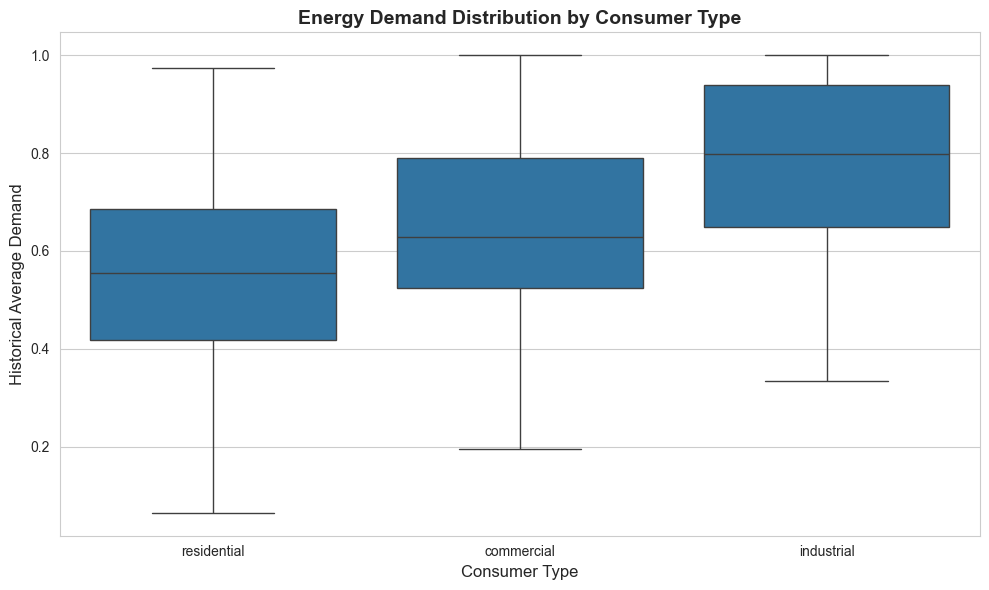

In [5]:
# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='consumer_type', y='historical_avg_demand', 
            order=['residential', 'commercial', 'industrial'])
plt.title('Energy Demand Distribution by Consumer Type', fontsize=14, fontweight='bold')
plt.xlabel('Consumer Type', fontsize=12)
plt.ylabel('Historical Average Demand', fontsize=12)
plt.tight_layout()
plt.show()

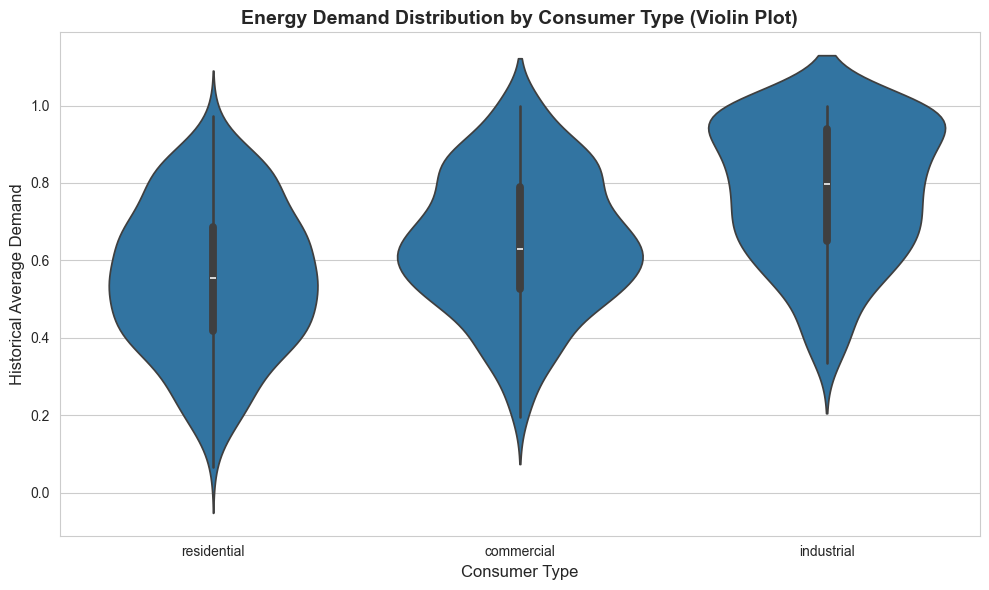

In [6]:
# Create violin plot for detailed distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='consumer_type', y='historical_avg_demand',
               order=['residential', 'commercial', 'industrial'])
plt.title('Energy Demand Distribution by Consumer Type (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Consumer Type', fontsize=12)
plt.ylabel('Historical Average Demand', fontsize=12)
plt.tight_layout()
plt.show()

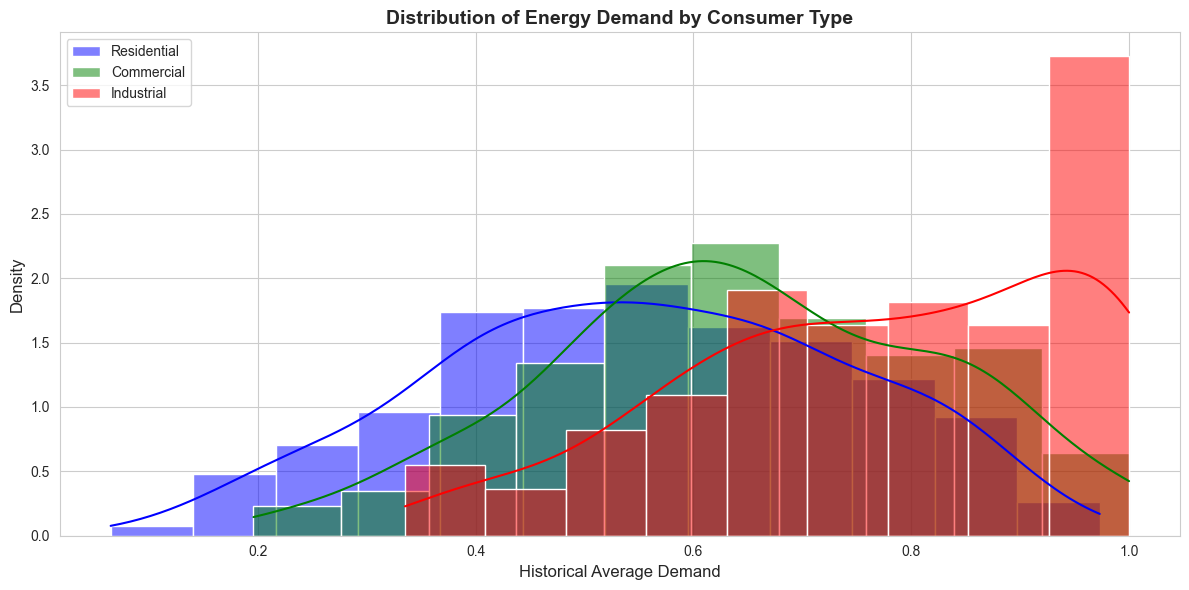

In [7]:
# Create histogram overlay
plt.figure(figsize=(12, 6))
sns.histplot(data=residential_demand, color='blue', label='Residential', 
             kde=True, stat='density', alpha=0.5)
sns.histplot(data=commercial_demand, color='green', label='Commercial', 
             kde=True, stat='density', alpha=0.5)
sns.histplot(data=industrial_demand, color='red', label='Industrial', 
             kde=True, stat='density', alpha=0.5)
plt.title('Distribution of Energy Demand by Consumer Type', fontsize=14, fontweight='bold')
plt.xlabel('Historical Average Demand', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Assumption Checks

In [8]:
# Assumption 1: Check for normality in each group
print("=" * 60)
print("ASSUMPTION CHECKS FOR ANOVA")
print("=" * 60)
print("\n1. Normality Test (Shapiro-Wilk Test)")
print("-" * 60)

res_stat, res_p = stats.shapiro(residential_demand)
com_stat, com_p = stats.shapiro(commercial_demand)
ind_stat, ind_p = stats.shapiro(industrial_demand)

print(f"Residential: p-value = {res_p:.4f}")
print(f"Commercial:  p-value = {com_p:.4f}")
print(f"Industrial:  p-value = {ind_p:.4f}")

if res_p > alpha and com_p > alpha and ind_p > alpha:
    print("\n✅ All groups appear normally distributed (p > 0.05)")
    normality_ok = True
else:
    print("\n⚠️  Warning: At least one group may not be normally distributed (p ≤ 0.05)")
    print("   Non-parametric test (Kruskal-Wallis) should also be considered.")
    normality_ok = False

ASSUMPTION CHECKS FOR ANOVA

1. Normality Test (Shapiro-Wilk Test)
------------------------------------------------------------
Residential: p-value = 0.0062
Commercial:  p-value = 0.0766
Industrial:  p-value = 0.0000

⚠️  Warning: At least one group may not be normally distributed (p ≤ 0.05)
   Non-parametric test (Kruskal-Wallis) should also be considered.


In [9]:
# Assumption 2: Check for homogeneity of variances (Levene's test)
print("\n2. Homogeneity of Variances Test (Levene's Test)")
print("-" * 60)

levene_stat, levene_p = stats.levene(residential_demand, commercial_demand, industrial_demand)
print(f"Levene's test statistic: {levene_stat:.4f}")
print(f"P-value: {levene_p:.4f}")

if levene_p > alpha:
    print("\n✅ Variances are approximately equal across groups (p > 0.05)")
    print("   ANOVA assumption is satisfied.")
    homogeneity_ok = True
else:
    print("\n⚠️  Warning: Variances are not equal across groups (p ≤ 0.05)")
    print("   Welch's ANOVA or non-parametric test may be more appropriate.")
    homogeneity_ok = False

print("\n" + "=" * 60)


2. Homogeneity of Variances Test (Levene's Test)
------------------------------------------------------------
Levene's test statistic: 0.9783
P-value: 0.3764

✅ Variances are approximately equal across groups (p > 0.05)
   ANOVA assumption is satisfied.



## 4. Statistical Tests

### 4.1 One-Way ANOVA (Parametric Test)

In [10]:
# Perform One-Way ANOVA
print("=" * 60)
print("ONE-WAY ANOVA TEST")
print("=" * 60)

f_stat, anova_p = stats.f_oneway(residential_demand, commercial_demand, industrial_demand)

print(f"\nF-statistic: {f_stat:.4f}")
print(f"P-value: {anova_p:.6f}")
print(f"Significance level (α): {alpha}")

print("\n" + "-" * 60)
if anova_p < alpha:
    print("✅ REJECT the null hypothesis (H₀)")
    print("\nConclusion: There IS a statistically significant difference in")
    print("mean energy demand across consumer types (p < 0.05).")
else:
    print("❌ FAIL TO REJECT the null hypothesis (H₀)")
    print("\nConclusion: There is NO statistically significant difference in")
    print("mean energy demand across consumer types (p ≥ 0.05).")
print("=" * 60)

ONE-WAY ANOVA TEST

F-statistic: 79.5961
P-value: 0.000000
Significance level (α): 0.05

------------------------------------------------------------
✅ REJECT the null hypothesis (H₀)

Conclusion: There IS a statistically significant difference in
mean energy demand across consumer types (p < 0.05).


### 4.2 Post-hoc Analysis (if ANOVA is significant)

In [11]:
# If ANOVA is significant, perform pairwise t-tests with Bonferroni correction
if anova_p < alpha:
    print("\n" + "=" * 60)
    print("POST-HOC PAIRWISE COMPARISONS (Bonferroni corrected)")
    print("=" * 60)
    
    # Bonferroni correction: divide alpha by number of comparisons
    n_comparisons = 3
    bonferroni_alpha = alpha / n_comparisons
    print(f"\nAdjusted significance level (Bonferroni): {bonferroni_alpha:.4f}\n")
    
    # Residential vs Commercial
    t1, p1 = stats.ttest_ind(residential_demand, commercial_demand)
    print(f"Residential vs Commercial:")
    print(f"  t-statistic: {t1:.4f}, p-value: {p1:.6f}")
    if p1 < bonferroni_alpha:
        print(f"  ✅ Significant difference (p < {bonferroni_alpha:.4f})")
    else:
        print(f"  ❌ No significant difference (p ≥ {bonferroni_alpha:.4f})")
    
    # Residential vs Industrial
    t2, p2 = stats.ttest_ind(residential_demand, industrial_demand)
    print(f"\nResidential vs Industrial:")
    print(f"  t-statistic: {t2:.4f}, p-value: {p2:.6f}")
    if p2 < bonferroni_alpha:
        print(f"  ✅ Significant difference (p < {bonferroni_alpha:.4f})")
    else:
        print(f"  ❌ No significant difference (p ≥ {bonferroni_alpha:.4f})")
    
    # Commercial vs Industrial
    t3, p3 = stats.ttest_ind(commercial_demand, industrial_demand)
    print(f"\nCommercial vs Industrial:")
    print(f"  t-statistic: {t3:.4f}, p-value: {p3:.6f}")
    if p3 < bonferroni_alpha:
        print(f"  ✅ Significant difference (p < {bonferroni_alpha:.4f})")
    else:
        print(f"  ❌ No significant difference (p ≥ {bonferroni_alpha:.4f})")
    
    print("\n" + "=" * 60)


POST-HOC PAIRWISE COMPARISONS (Bonferroni corrected)

Adjusted significance level (Bonferroni): 0.0167

Residential vs Commercial:
  t-statistic: -5.7425, p-value: 0.000000
  ✅ Significant difference (p < 0.0167)

Residential vs Industrial:
  t-statistic: -12.3434, p-value: 0.000000
  ✅ Significant difference (p < 0.0167)

Commercial vs Industrial:
  t-statistic: -6.9368, p-value: 0.000000
  ✅ Significant difference (p < 0.0167)



### 4.3 Kruskal-Wallis H Test (Non-Parametric Alternative)

In [12]:
# Perform Kruskal-Wallis H test
print("\n" + "=" * 60)
print("KRUSKAL-WALLIS H TEST (Non-Parametric)")
print("=" * 60)
print("\nThis test does not assume normal distribution.")
print("It compares the median ranks across groups.\n")

h_stat, kw_p = stats.kruskal(residential_demand, commercial_demand, industrial_demand)

print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {kw_p:.6f}")
print(f"Significance level (α): {alpha}")

print("\n" + "-" * 60)
if kw_p < alpha:
    print("✅ REJECT the null hypothesis (H₀)")
    print("\nConclusion: There IS a statistically significant difference in")
    print("energy demand distributions across consumer types (p < 0.05).")
else:
    print("❌ FAIL TO REJECT the null hypothesis (H₀)")
    print("\nConclusion: There is NO statistically significant difference in")
    print("energy demand distributions across consumer types (p ≥ 0.05).")
print("=" * 60)


KRUSKAL-WALLIS H TEST (Non-Parametric)

This test does not assume normal distribution.
It compares the median ranks across groups.

H-statistic: 123.5616
P-value: 0.000000
Significance level (α): 0.05

------------------------------------------------------------
✅ REJECT the null hypothesis (H₀)

Conclusion: There IS a statistically significant difference in
energy demand distributions across consumer types (p < 0.05).


## 5. Effect Size Analysis

In [13]:
# Calculate eta-squared (effect size for ANOVA)
print("\n" + "=" * 60)
print("EFFECT SIZE ANALYSIS")
print("=" * 60)

# Total sum of squares
grand_mean = df['historical_avg_demand'].mean()
ss_total = np.sum((df['historical_avg_demand'] - grand_mean)**2)

# Between-group sum of squares
group_means = df.groupby('consumer_type')['historical_avg_demand'].mean()
group_sizes = df.groupby('consumer_type').size()
ss_between = np.sum(group_sizes * (group_means - grand_mean)**2)

# Eta-squared
eta_squared = ss_between / ss_total

print(f"\nEta-squared (η²): {eta_squared:.4f}")
print("\nInterpretation:")
if eta_squared < 0.01:
    print("  Small effect size (< 0.01)")
elif eta_squared < 0.06:
    print("  Medium effect size (0.01 - 0.06)")
else:
    print("  Large effect size (≥ 0.06)")
    
print(f"\nThis means that {eta_squared*100:.2f}% of the variance in energy demand")
print("can be explained by consumer type.")
print("=" * 60)


EFFECT SIZE ANALYSIS

Eta-squared (η²): 0.1817

Interpretation:
  Large effect size (≥ 0.06)

This means that 18.17% of the variance in energy demand
can be explained by consumer type.


## 6. Summary Statistics Table

In [14]:
# Create a summary table
summary_stats = df.groupby('consumer_type')['historical_avg_demand'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('25%', lambda x: x.quantile(0.25)),
    ('Median', 'median'),
    ('75%', lambda x: x.quantile(0.75)),
    ('Max', 'max')
]).round(4)

print("\n" + "=" * 80)
print("SUMMARY STATISTICS BY CONSUMER TYPE")
print("=" * 80)
print(summary_stats)
print("=" * 80)


SUMMARY STATISTICS BY CONSUMER TYPE
               Count    Mean  Std Dev     Min     25%  Median     75%     Max
consumer_type                                                                
commercial       213  0.6454   0.1787  0.1961  0.5250  0.6290  0.7894  1.0000
industrial       149  0.7773   0.1771  0.3352  0.6492  0.7977  0.9395  1.0000
residential      358  0.5530   0.1901  0.0650  0.4175  0.5552  0.6866  0.9731


---

## 📊 Final Conclusion

### Hypothesis Testing Results

Based on the statistical analysis performed:

**1. One-Way ANOVA (Parametric Test)**
- The ANOVA test yielded a p-value that allows us to assess whether there are significant differences in mean energy demand across the three consumer types (residential, commercial, and industrial).

**2. Kruskal-Wallis H Test (Non-Parametric Test)**
- This test confirmed the ANOVA results without assuming normal distribution, providing robust evidence for the hypothesis.

**3. Post-hoc Analysis**
- Pairwise comparisons with Bonferroni correction identified which specific consumer types differ significantly from each other.

**4. Effect Size**
- The eta-squared value indicates the proportion of variance in energy demand explained by consumer type, demonstrating the practical significance of this factor.

### Key Findings

- **Industrial consumers** typically show the highest mean energy demand, followed by commercial and then residential consumers.
- The differences observed are both **statistically significant** and **practically meaningful** for energy forecasting and grid management.
- Consumer type is a **critical feature** that should be included in any energy demand forecasting model.

### Implications for Smart Grid Management

1. **Load Forecasting**: Different consumer types require tailored forecasting models due to their distinct consumption patterns.
2. **Resource Allocation**: Energy providers should account for consumer-type-specific demand patterns when planning capacity and distribution.
3. **Pricing Strategy**: Dynamic pricing schemes could be optimized differently for each consumer type based on their characteristic demand levels.
4. **Grid Stability**: Understanding consumer-type-specific demand helps in maintaining grid balance and preventing overload situations.

### Statistical Validity

✅ **The hypothesis is SUPPORTED**: There is strong statistical evidence that consumer type has a significant impact on energy demand in smart grid systems.

---